In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, log_loss
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [2]:
hr = pd.read_csv("C:/Python/Cases/human-resources-analytics/HR_comma_sep.csv")
X = hr.drop('left', axis=1)
y = hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [6]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
trns = make_column_transformer((ohe, make_column_selector(dtype_include=object) ), 
                               remainder='passthrough', verbose_feature_names_out=False)
trns = trns.set_output(transform='pandas')
X_train_trns = trns.fit_transform(X_train)
X_test_trns = trns.transform(X_test)

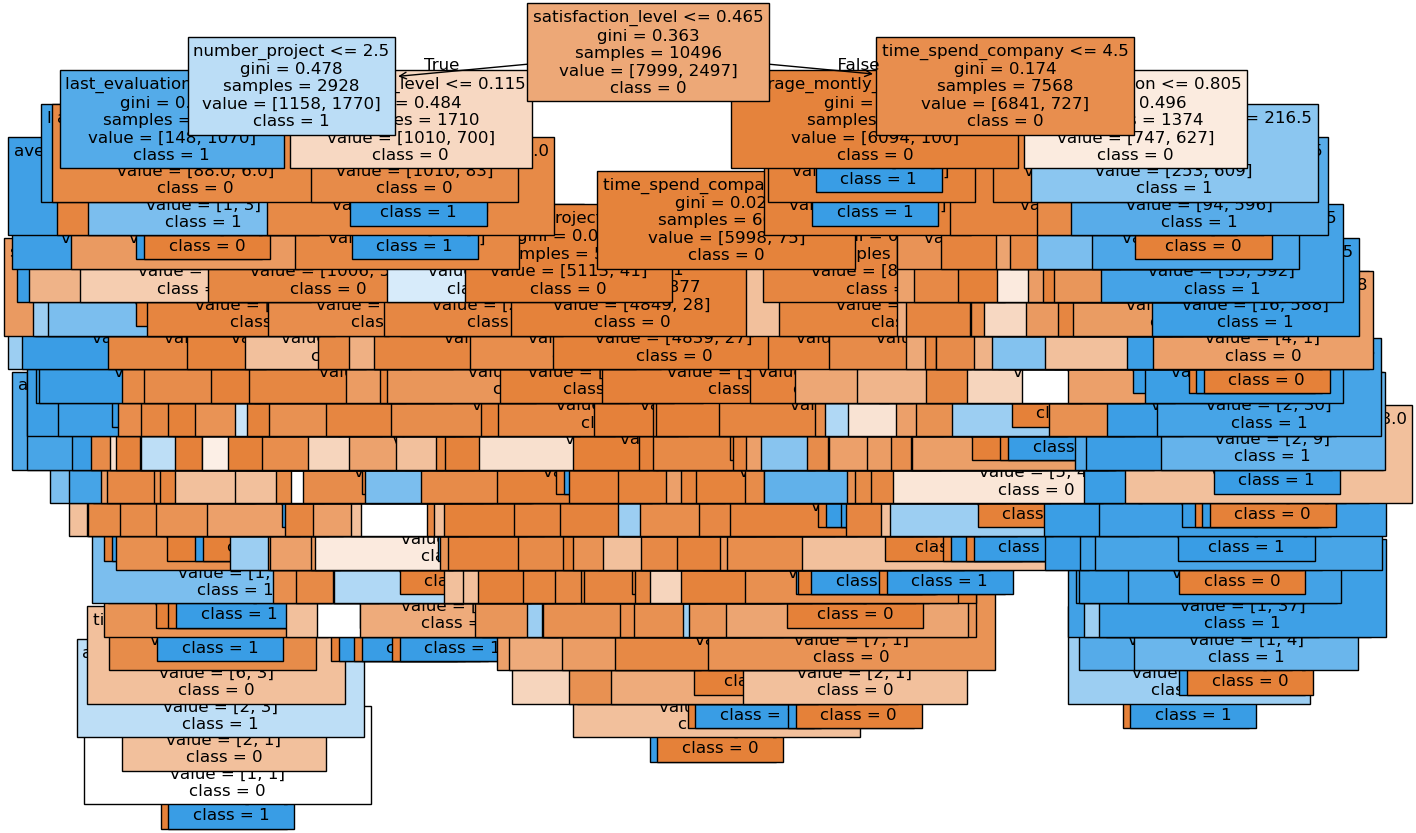

In [32]:
dtc = DecisionTreeClassifier(random_state=25, max_depth=None, criterion='gini')
dtc.fit(X_train_trns, y_train)
plt.figure(figsize=(15,10))
plot_tree(dtc, feature_names=list(X_train_trns.columns), 
          class_names=['0','1'], filled=True,fontsize=12)
plt.show() 

In [30]:
X_test_trns.iloc[-3]

Department_RandD            0.00
Department_accounting       0.00
Department_hr               0.00
Department_management       0.00
Department_marketing        1.00
Department_product_mng      0.00
Department_sales            0.00
Department_support          0.00
Department_technical        0.00
salary_low                  1.00
salary_medium               0.00
satisfaction_level          0.37
last_evaluation             0.52
number_project              2.00
average_montly_hours      143.00
time_spend_company          3.00
Work_accident               0.00
promotion_last_5years       0.00
Name: 148, dtype: float64

In [33]:
y_pred = dtc.predict(X_test_trns)
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3429
           1       0.95      0.97      0.96      1070

    accuracy                           0.98      4499
   macro avg       0.97      0.98      0.97      4499
weighted avg       0.98      0.98      0.98      4499



In [37]:
depths = [3,4,5,6,7,8,9, 10, 11]
scores = []
for d in depths:
    dtc = DecisionTreeClassifier(random_state=25, max_depth=d)
    dtc.fit(X_train_trns, y_train)
    y_pred = dtc.predict(X_test_trns)
    scores.append([d, f1_score(y_test, y_pred, pos_label=1 )] )
df_scores = pd.DataFrame( scores, columns=['depth','score'] )
df_scores.sort_values( 'score', ascending=False )

,depth,score
6,9,0.962751
7,10,0.962013
4,7,0.959770
5,8,0.959311
8,11,0.958982
3,6,0.955981
2,5,0.951382
1,4,0.934967
0,3,0.909672


In [41]:
depths = [3,4,5,6,7,8,9, 10, 11, None]
leaves = [1,50, 75, 100, 150]
splits = [2,50, 75, 100, 150]
scores = []
for d in depths:
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeClassifier(random_state=25, max_depth=d,
                                         min_samples_leaf=l, min_samples_split=s)
            dtc.fit(X_train_trns, y_train)
            y_pred = dtc.predict(X_test_trns)
            scores.append([d,l,s, f1_score(y_test, y_pred, pos_label=1 )] )
df_scores = pd.DataFrame( scores, columns=['depth','leaf','split','score'] )
df_scores.sort_values( 'score', ascending=False )

,depth,leaf,split,score
150,9.0,1,2,0.962751
175,10.0,1,2,0.962013
225,NaN,1,2,0.961290
202,11.0,1,75,0.960539
177,10.0,1,75,0.960539
...,...,...,...,...
21,3.0,150,50,0.888268
22,3.0,150,75,0.888268
23,3.0,150,100,0.888268
24,3.0,150,150,0.888268


Building the best model on whole data

In [ ]:
best_tree = DecisionTreeClassifier(random_state=25, max_depth=9,
                                  min_samples_leaf=1, min_samples_split=2)
X_trns = trns.fit_transform(X)
best_tree.fit(X_trns, y)

In [48]:
df_imp = pd.DataFrame({'feature':list(X_trns.columns),'imp': best_tree.feature_importances_})
df_imp.sort_values('imp', ascending=False)

,feature,imp
11,satisfaction_level,0.519846
15,time_spend_company,0.148528
12,last_evaluation,0.143526
13,number_project,0.108963
14,average_montly_hours,0.074325
9,salary_low,0.002113
10,salary_medium,0.000770
8,Department_technical,0.000612
7,Department_support,0.000431
0,Department_RandD,0.000373


In [46]:
X_trns.columns

Index(['Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium',
       'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')

#### Glass Identification

In [49]:
glass = pd.read_csv("C:/Python/Cases/Glass_Identification/Glass.csv")
y = glass['Type']
X = glass.drop('Type', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [52]:
depths = [2,3,4,5, None]
leaves = [1,5,10,20]
splits = [2,5,10,20]
scores = []
for d in depths:
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeClassifier(random_state=25, max_depth=d,
                                         min_samples_leaf=l, min_samples_split=s)
            dtc.fit(X_train, y_train)
            y_pred_prob = dtc.predict_proba(X_test)
            scores.append([d,l,s, log_loss(y_test, y_pred_prob )] )
df_scores = pd.DataFrame( scores, columns=['depth','leaf','split','score'] )
df_scores.sort_values( 'score', ascending=True )

,depth,leaf,split,score
15,2.0,20,20,1.627429
14,2.0,20,10,1.627429
13,2.0,20,5,1.627429
12,2.0,20,2,1.627429
79,NaN,20,20,1.932912
...,...,...,...,...
68,NaN,5,2,5.919950
69,NaN,5,5,5.919950
70,NaN,5,10,5.919950
65,NaN,1,5,8.488387


In [53]:
best_tree = DecisionTreeClassifier(random_state=25, max_depth=2,
                                  min_samples_leaf=20, min_samples_split=20)
best_tree.fit(X, y)
df_imp = pd.DataFrame({'feature':list(X.columns),'imp': best_tree.feature_importances_})
df_imp.sort_values('imp', ascending=False)

,feature,imp
7,Ba,0.618193
3,Al,0.381807
0,RI,0.000000
1,Na,0.000000
2,Mg,0.000000
4,Si,0.000000
5,K,0.000000
6,Ca,0.000000
8,Fe,0.000000
